In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [11]:
ticker = "ASIANPAINT.NS"
start_date = '2018-01-01'
end_date = '2023-10-31'

In [12]:
df = yf.download(ticker, start_date, end_date).reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,1163.000000,1165.000000,1138.099976,1143.650024,1096.119263,591349
1,2018-01-02,1146.000000,1150.000000,1134.050049,1142.750000,1095.256714,516171
2,2018-01-03,1149.000000,1149.000000,1135.300049,1141.900024,1094.442261,593809
3,2018-01-04,1149.000000,1178.000000,1145.900024,1172.050049,1123.339111,729965
4,2018-01-05,1178.000000,1192.000000,1167.449951,1185.250000,1135.990479,1151320
...,...,...,...,...,...,...,...
1435,2023-10-23,3096.050049,3108.899902,3064.000000,3072.000000,3066.646729,374476
1436,2023-10-25,3093.399902,3108.000000,3052.000000,3060.800049,3055.466309,669290
1437,2023-10-26,3051.100098,3055.000000,2940.000000,2960.300049,2955.141357,1834111
1438,2023-10-27,2932.800049,2974.649902,2931.000000,2955.149902,2950.000244,1708185


In [13]:
data = df['Close']

scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))

In [14]:
training_data_len = int(len(data) * 0.8)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1152, 288)

In [15]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 12s 14ms/step - loss: 0.2297
Epoch 2/200
6/6 [==============================] - 0s 15ms/step - loss: 0.1888
Epoch 3/200
6/6 [==============================] - 0s 16ms/step - loss: 0.1484
Epoch 4/200
6/6 [==============================] - 0s 20ms/step - loss: 0.1098
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0812
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0742
Epoch 7/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0720
Epoch 8/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0611
Epoch 9/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0511
Epoch 10/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0395
Epoch 11/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0255
Epoch 12/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0134
Epoch 13/200
6/6 [==============================

6/6 [==============================] - 0s 18ms/step - loss: 2.4183e-04
Epoch 100/200
6/6 [==============================] - 0s 16ms/step - loss: 2.4156e-04
Epoch 101/200
6/6 [==============================] - 0s 19ms/step - loss: 2.4096e-04
Epoch 102/200
6/6 [==============================] - 0s 19ms/step - loss: 2.4028e-04
Epoch 103/200
6/6 [==============================] - 0s 23ms/step - loss: 2.4011e-04
Epoch 104/200
6/6 [==============================] - 0s 12ms/step - loss: 2.4414e-04
Epoch 105/200
6/6 [==============================] - 0s 16ms/step - loss: 2.4113e-04
Epoch 106/200
6/6 [==============================] - 0s 14ms/step - loss: 2.3999e-04
Epoch 107/200
6/6 [==============================] - 0s 16ms/step - loss: 2.4025e-04
Epoch 108/200
6/6 [==============================] - 0s 15ms/step - loss: 2.4100e-04
Epoch 109/200
6/6 [==============================] - 0s 16ms/step - loss: 2.4218e-04
Epoch 110/200
6/6 [==============================] - 0s 14ms/step - loss: 2.411

6/6 [==============================] - 0s 13ms/step - loss: 2.4245e-04
Epoch 196/200
6/6 [==============================] - 0s 11ms/step - loss: 2.4168e-04
Epoch 197/200
6/6 [==============================] - 0s 15ms/step - loss: 2.4685e-04
Epoch 198/200
6/6 [==============================] - 0s 13ms/step - loss: 2.4361e-04
Epoch 199/200
6/6 [==============================] - 0s 14ms/step - loss: 2.4455e-04
Epoch 200/200
6/6 [==============================] - 0s 17ms/step - loss: 2.4414e-04


In [17]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [18]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [19]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 25.667806484510745
Root Mean Squared Error (RMSE): 38.30654588463049


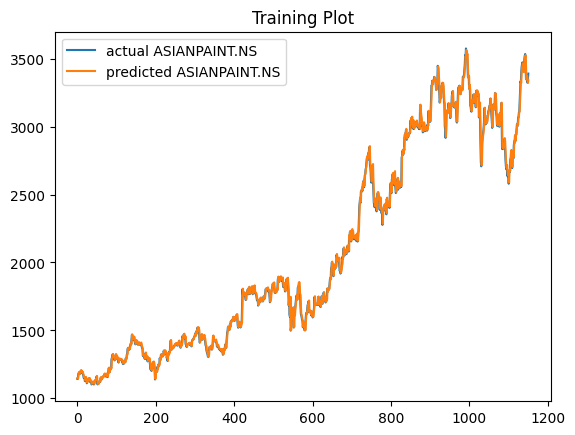

In [20]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 25.95427169533974
Root Mean Squared Error (RMSE): 36.05377658464278


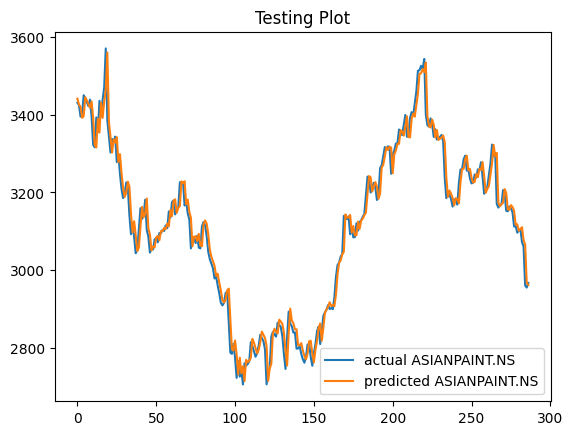

In [21]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

In [22]:
y_test[-1]

2967.10009765625

In [23]:
pred[-1]

array([2962.1147], dtype=float32)

In [24]:
start_date = '2023-11-01'
end_date = '2023-12-08'
future_data = yf.download(ticker, start_date, end_date).reset_index()['Close']
future_data

[*********************100%***********************]  1 of 1 completed


0     2934.550049
1     2955.399902
2     2977.850098
3     3029.300049
4     3033.350098
5     3095.250000
6     3080.199951
7     3076.449951
8     3085.600098
9     3116.199951
10    3130.300049
11    3168.899902
12    3140.350098
13    3133.250000
14    3133.000000
15    3122.949951
16    3136.149902
17    3148.350098
18    3148.350098
19    3119.899902
20    3173.399902
21    3194.550049
22    3226.250000
23    3252.550049
24    3251.800049
Name: Close, dtype: float64

In [25]:
future_data = np.array(future_data)
len(future_data)

25

In [26]:
# model(april1) = (april2-pred) -> april2actual



# model(april2-pred) = april3-pred

In [27]:
def predict_future(days, last_input, future_data):
    Output = []
    i = 0
    temp = scaler.transform(future_data.reshape(-1, 1))
    
    while(i<days):
        if(len(last_input)>past_values):
            last_input = last_input[1:]
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            last_input = last_input[1:]
            Output.extend(res.tolist())
            i=i+1
        else:
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            Output.extend(res.tolist())
            i=i+1
        
    Output = scaler.inverse_transform(Output)
    return Output, last_input
    
future_predictions, last_input = predict_future(len(future_data), X_test[-1], future_data)
future_predictions = future_predictions.flatten()

1/1 [==============================] - 0s 70ms/step


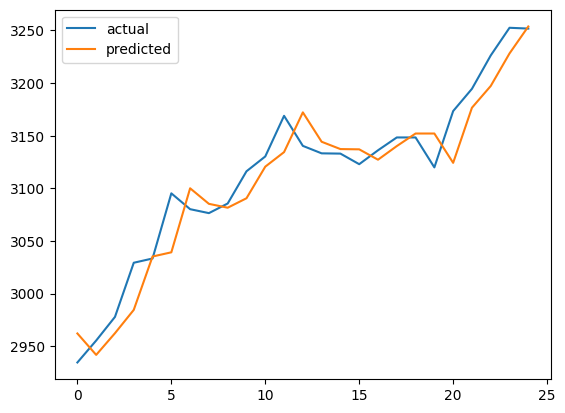

In [28]:
plt.plot(future_data, label = 'actual')
plt.plot(future_predictions, label = 'predicted')
plt.legend()
plt.show()

In [29]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [30]:
controls_actual = get_control_vector(future_data)
amount_actual = buy_and_sell_bot(future_data, controls_actual)

In [31]:
controls_pred= get_control_vector(future_predictions)
amount_pred = buy_and_sell_bot(future_predictions, controls_pred)

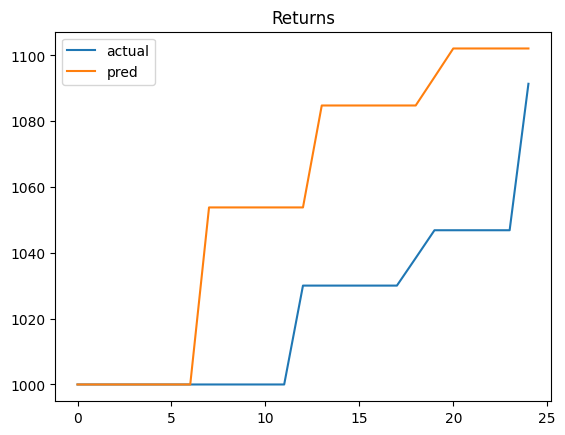

In [32]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()